In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$mL^2\ddot{\phi}=-mgLsin(\phi)+F_0cos(\omega t)$$

$$\frac{d}{dt}\left(
\begin{matrix}
    \phi   \\
    \omega
\end{matrix}\right)
=
\left[
\begin{matrix}
   \omega \\
   \dfrac{-g}{L}sin(\phi)+\frac{F_{0}cos(\omega)}{mL^2}
\end{matrix}\right]
=
f(\phi,\omega,t)
$$

$y_{n+1}$ es un conjunto de parametros

In [118]:
# constantes

m = 0.85 * 1.0464
L = 1.75 * 1.0464
F_o = 0.05 * 1.0464
g = 9.8

In [119]:
# condiciones iniciales
phi_t0 = 0.
w_t0 = 0.
t_0 = 0.

$y_{n+1}$ = $y_{n}+\frac{1}{6}(k_6+2(k_3+k_2)+k_1)$

$k_1=h f_n \quad f_n$ es la funcion f evaluada en $y_n$ es decir los parametros en el paso n 

$k_2=hf(t_n+\dfrac{h}{2},y_n +\dfrac{k_1}{2})$

$k_3=hf(t_n+\dfrac{h}{2},y_n +\dfrac{k_2}{2})$

$k_4=hf(t_n+h,y_n +k_3)$

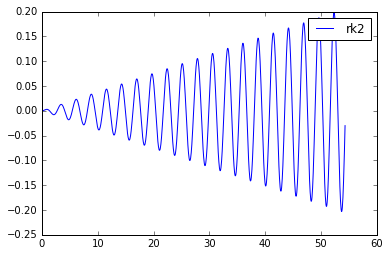

In [120]:
# Solucion para pequeñas oscilaciones
freq = np.sqrt(g/L)
omega_forz= freq - 0.
N_osc = 20     # Numero de osciolaciones
Nsteps = 1000
t = np.linspace(0, N_osc * 2 * np.pi / freq, Nsteps)
#plt.plot(t, phi_po, label=u'pequeñas oscilaciones')

# Usando RK4
def f(phi, omega,t):
    output = [omega, -g/L*np.sin(phi) + F_o * np.cos(omega_forz * t) / (m * L** 2 ) ]
    return output

def calc_k1(f, phi_n, omega_n, t_n, h):
    fn = f(phi_n, omega_n, t_n)
    output = [h * fn[0], h * fn[1]]
    return output

def calc_k2(f, phi_n, omega_n, t_n, h):
    k1 = calc_k1(f, phi_n, omega_n, t_n, h)
    f_k2 = f(phi_n + k1[0]/2, omega_n + k1[1]/2, t_n + h/2)
    output = [h * f_k2[0], h * f_k2[1]]
    return output

def calc_k3(f, phi_n, omega_n, t_n, h):
    k2 = calc_k2(f, phi_n, omega_n, t_n, h)
    f_k3 = f(phi_n + k2[0]/2, omega_n + k2[1]/2, t_n + h/2)
    output = [h * f_k3[0], h * f_k3[1]]
    return output

def calc_k4(f, phi_n, omega_n, t_n, h):
    k3 = calc_k3(f, phi_n, omega_n, t_n, h)
    f_4 = f(phi_n + k3[0], omega_n + k3[1], t_n + h)
    output = [h * f_4[0], h * f_4[1]]
    return output


def rk4_step(f, phi_n, omega_n, t_n, h):
    k1 = calc_k1(f, phi_n, omega_n, t_n, h)
    k2 = calc_k2(f, phi_n, omega_n, t_n, h)
    k3 = calc_k3(f, phi_n, omega_n, t_n, h)
    k4 = calc_k4(f, phi_n, omega_n, t_n, h)
    phi_next = phi_n + (k4[0] + 2*(k3[0] + k2[0]) + k1[0])/6 
    omega_next = omega_n + (k4[1] + 2*(k3[1] + k2[1]) + k1[1])/6 
    
    output = [phi_next, omega_next]
    return output


h = N_osc * 2 * np.pi / (freq * Nsteps)

phi_arr = np.zeros(Nsteps)
omega_arr = np.zeros(Nsteps)

# Condiciones iniciales
phi_arr[0] = phi_t0
omega_arr[0] = w_t0

for i in range(1, Nsteps):
    phi_arr[i], omega_arr[i] = rk4_step(f, phi_arr[i-1], omega_arr[i-1], t[i-1], h)


plt.plot(t, phi_arr, label='rk2')


plt.legend()

In [125]:
N=1000
Nsteps = 100
eps = 1e-1

omega_forz= freq - 0.1

phi_max=[]
omega_lista=[]

phi_arr = np.zeros(Nsteps)
omega_arr = np.zeros(Nsteps)

for j in range(N):
    omega_forz+=eps
    for i in range(1, Nsteps):
        phi_arr[i], omega_arr[i] = rk4_step(f, phi_arr[i-1], omega_arr[i-1], t[i-1], h)
    phi_max.append(max(phi_arr))
    omega_lista.append(omega_forz)

In [126]:
max_phi= max(phi_max) 
max_omega_forz= omega_lista[np.where(phi_max == max(phi_max))[0][0]]
print max_omega_forz, max_phi

2.31337025942 0.0129397868923
